## Project 2.0 using Keras [Neural Network]

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

## Processing Input and Label Data

In [2]:
def processData(dataset):
    
    Feature = pd.read_csv('HOFD.csv', index_col=False)
    allFeature = Feature.drop(Feature.columns[0], axis = 1, inplace=True)
    Samepair = pd.read_csv('same_pairs.csv')
    Diffpair = pd.read_csv('diffn_pairs.csv')
    Diffpair_new = Diffpair.sample(791)
    listy = [Samepair, Diffpair_new]
    mixed = pd.concat(listy)
    mixed_shuffled = shuffle(mixed) 
    t = mixed_shuffled['target']   
    mixed_shuffled = mixed_shuffled.drop(['target'], axis = 1)
    data1 = pd.merge(left=mixed_shuffled, right=Feature, left_on='img_id_A', right_on='img_id')
    data2 = pd.merge(left=data1, right=Feature, left_on='img_id_B', right_on='img_id')
    data2 = data2.loc[:, ~data2.columns.str.contains('^img_id')]

    processedLabel = t.as_matrix()
    processedData = data2.as_matrix()
    
    return processedData, processedLabel

In [3]:
from keras.utils import np_utils

def encodeLabel(labels):
    return np_utils.to_categorical(np.array(processedLabel),2)

Using TensorFlow backend.


## Create Testing Datasets

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 18
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes  = 128
third_dense_layer_nodes  = 2

def get_model():
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.summary()

    model.compile(optimizer='adamax',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Model</font>

In [5]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               9728      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
__________

# <font color = blue>Run Model</font>

In [6]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('HOFD.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
processedLabel = encodeLabel(processedLabel)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

C:\Users\sagni\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\sagni\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train on 1265 samples, validate on 317 samples
Epoch 1/10000
1265/1265 [==============================] - 0s 321us/step - loss: 0.6938 - acc: 0.5051 - val_loss: 0.6950 - val_acc: 0.4700
Epoch 2/10000
1265/1265 [==============================] - 0s 49us/step - loss: 0.6927 - acc: 0.5083 - val_loss: 0.6934 - val_acc: 0.4795
Epoch 3/10000
1265/1265 [==============================] - 0s 44us/step - loss: 0.6922 - acc: 0.5296 - val_loss: 0.6928 - val_acc: 0.5110
Epoch 4/10000
1265/1265 [==============================] - 0s 61us/step - loss: 0.6919 - acc: 0.5399 - val_loss: 0.6921 - val_acc: 0.5363
Epoch 5/10000
1265/1265 [==============================] - 0s 55us/step - loss: 0.6912 - acc: 0.5360 - val_loss: 0.6917 - val_acc: 0.5110
Epoch 6/10000
1265/1265 [==============================] - 0s 44us/step - loss: 0.6904 - acc: 0.5320 - val_loss: 0.6925 - val_acc: 0.5363
Epoch 7/10000
1265/1265 [==============================] - 0s 55us/step - loss: 0.6895 - acc: 0.5557 - val_loss: 0.6908 - va

1265/1265 [==============================] - 0s 59us/step - loss: 0.6477 - acc: 0.6372 - val_loss: 0.7122 - val_acc: 0.5016
Epoch 60/10000
1265/1265 [==============================] - 0s 56us/step - loss: 0.6418 - acc: 0.6443 - val_loss: 0.7114 - val_acc: 0.4921
Epoch 61/10000
1265/1265 [==============================] - ETA: 0s - loss: 0.6445 - acc: 0.636 - 0s 61us/step - loss: 0.6427 - acc: 0.6395 - val_loss: 0.7150 - val_acc: 0.4826
Epoch 62/10000
1265/1265 [==============================] - 0s 52us/step - loss: 0.6376 - acc: 0.6506 - val_loss: 0.7122 - val_acc: 0.4890
Epoch 63/10000
1265/1265 [==============================] - 0s 54us/step - loss: 0.6373 - acc: 0.6458 - val_loss: 0.7158 - val_acc: 0.4984
Epoch 64/10000
1265/1265 [==============================] - 0s 63us/step - loss: 0.6369 - acc: 0.6593 - val_loss: 0.7141 - val_acc: 0.4984
Epoch 65/10000
1265/1265 [==============================] - 0s 52us/step - loss: 0.6345 - acc: 0.6443 - val_loss: 0.7178 - val_acc: 0.4795
Epoc

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2677972B0>,
      dtype=object)

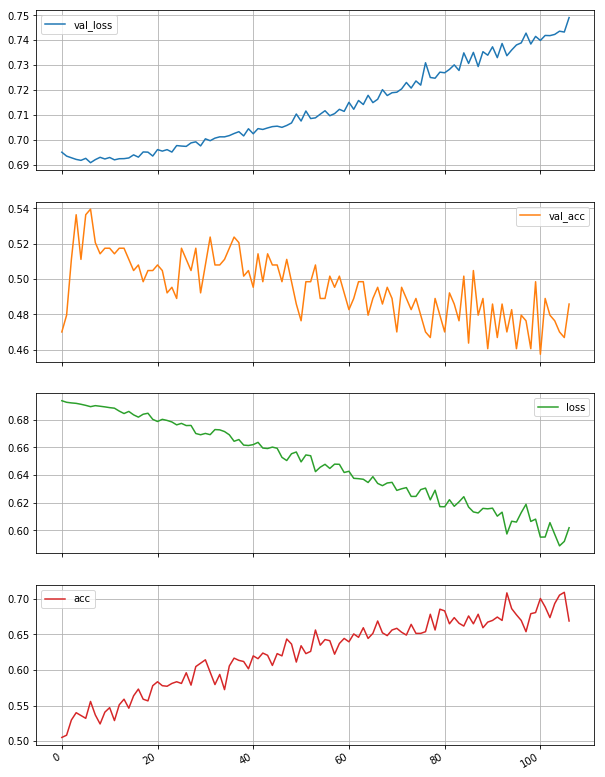

In [7]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))